<a href="https://colab.research.google.com/github/sangammagariaravind123/Fashion_MNIST/blob/main/Fashion_MNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
keras=tf.keras

mnist = keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()
print(train_img.shape)
print(test_img.shape)
print(train_label.shape)
print(test_label.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


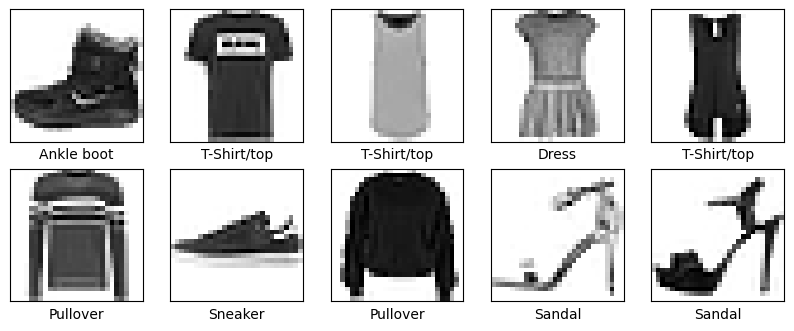

In [5]:
import matplotlib.pyplot as plt
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])

In [6]:
train_img=train_img.reshape(60000, 28, 28, 1)
train_img =train_img / 255.0
test_img = test_img.reshape(10000, 28, 28, 1)
test_img = test_img /255.0
print(train_img.shape)

(60000, 28, 28, 1)


In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2

def create(hidden_layers=[128, 64], activation='relu', optimizer='adam', weight_decay=0.0005):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(784,), kernel_regularizer=l2(weight_decay)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation, kernel_regularizer=l2(weight_decay)))
    model.add(Dense(10, activation='softmax'))

    optimizers = {
        'sgd': SGD(learning_rate=0.001),
        'momentum': SGD(learning_rate=0.001, momentum=0.9),
        'nesterov': SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
        'rmsprop': RMSprop(learning_rate=0.001),
        'adam': Adam(learning_rate=0.001)
    }
    opt = optimizers.get(optimizer, Adam(learning_rate=0.001))  # Default to Adam if optimizer is not found

    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

class mdls:#all models
  def __init__(s):
    s.one=

In [ ]:
model=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28, 28, 1)),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Conv2D(64,(3,3),activation='relu'),
                               keras.layers.MaxPooling2D(2,2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(128, activation='relu'),
                               keras.layers.Dense(10, activation='softmax')
                               ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
his=model.fit(train_img, train_label, epochs=5, validation_data=(test_img, test_label))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 57ms/step - accuracy: 0.7817 - loss: 0.6084 - val_accuracy: 0.8828 - val_loss: 0.3309
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 51ms/step - accuracy: 0.8918 - loss: 0.2991 - val_accuracy: 0.8973 - val_loss: 0.2911
Epoch 3/5
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9066 - loss: 0.2539

In [ ]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 6

for x in range(0, 4):
    f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
    axarr[2, x].grid(False)

plt.show()

In [ ]:
#All cells code at one place (one cell)
# import tensorflow as tf
# keras=tf.keras

# mnist = keras.datasets.fashion_mnist
# (train_img, train_label), (test_img, test_label) = mnist.load_data()
# print(train_img.shape)
# print(test_img.shape)
# print(train_label.shape)
# print(test_label.shape)

# import matplotlib.pyplot as plt
# class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# plt.figure(figsize=(10, 10))
# for i in range(10):
#   plt.subplot(5,5,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(train_img[i], cmap=plt.cm.binary)
#   plt.xlabel(class_names[train_label[i]])

# train_img=train_img.reshape(60000, 28, 28, 1)
# train_img =train_img / 255.0
# test_img = test_img.reshape(10000, 28, 28, 1)
# test_img = test_img /255.0

# model=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28, 28, 1)),
#                                keras.layers.MaxPooling2D(2,2),
#                                keras.layers.Conv2D(64,(3,3),activation='relu'),
#                                keras.layers.MaxPooling2D(2,2),
#                                keras.layers.Flatten(),
#                                keras.layers.Dense(128, activation='relu'),
#                                keras.layers.Dense(10, activation='softmax')
#                                ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# his=model.fit(train_img, train_label, epochs=5, validation_data=(test_img, test_label))

# layer_outputs = [layer.output for layer in model.layers]
# activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

# f, axarr = plt.subplots(3, 4)
# FIRST_IMAGE = 0
# SECOND_IMAGE = 23
# THIRD_IMAGE = 28
# CONVOLUTION_NUMBER = 6

# for x in range(0, 4):
#     f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
#     axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
#     axarr[0, x].grid(False)

#     f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
#     axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
#     axarr[1, x].grid(False)

#     f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
#     axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='grey')
#     axarr[2, x].grid(False)

plt.show()